<a href="https://colab.research.google.com/github/SoobinLee1/coding_exercise/blob/main/%EB%B0%B1%EC%A4%80_2624_%EB%8F%99%EC%A0%84%EB%B0%94%EA%BE%B8%EC%96%B4%EC%A3%BC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2차원 dp를 생각해내지 못하고, dfs+dp로 풀려고 한다. dfs+dp로 푸려고 시도했던 방법은 다음과 같다. 1) 동전 리스트를 만든다. 2) 기준동전과 기준 동전+1idx, 즉 옆 동전들을 고정해가면서 마지막 동전+1개, ...(한 사이클 끝나면) , 마지막-1idx 동전+1개, 마지막 동전+1개, ... 이런 식으로 진행하려고 했다.

우선 dfs하려고 하니 재귀가 필요하고, 재귀 return 조건을 1. 기준 cost를 만들 수 없는 경우 즉 마지막 인덱스까지 cum_cost>cost 혹은 cum_cost<cost일 경우 ==> return 0  /  2. pocket 안에 들어있는 개수를 초과할 경우 ==> return 0  /  3. 가격을 맞출 수 있는 경우 return 1 으로 앞부분에 고정해두고, 해당 경우가 아닌 경우 아래 increment코드가 돌아가도록 한다.

지금까지 선택된 가격을 visited 로 만들어서 누적 가격을 계산하려고 했다. 그후 누적 가격을 key로 갖는 dp 배열을 만들어서 가격을 저장해두고 cnt를 늘려가려고 생각했었다. 재귀함수의 특성 상 재귀 argument 값에서만 값이 변형되도록 해서 다음 재귀 함수 호출에 사용되도록 하는 것이 좋은데, 그렇다면 temp 배열을 만들어서 다음 호출에서만 temp visited 배열이 들어가도록 해야할 것이다. 이것저것 생각하다보면 1차원 테이블로 접근해서 누적 금액 dp를 업데이트하기에는 코드 낭비, 메모리낭비가 발생한다.

In [ ]:
## 초기 풀이 ##

cost = int(input())
K = int(input())
pockets = {}
for k in range(K):
  temp1, temp2 = list(map(int,input().split(" ")))
  pockets[temp1]=temp2
dp = {}
visited = {}
for key in pockets.keys():
  visited[key]=0

def dfs(cum_cost, cost, coin, visited, pockets, depth):
  if cum_cost > cost:
    return 0
  if visited[coin]>=pockets[coin]:
    return 0
  if cum_cost == cost:
    visited[coin]=0
    return 1
 
  visited[coin]+=1
  cum_cost += coin
  print(cum_cost, visited)
  if cum_cost not in dp.keys():
    dp[cum_cost]=0
  dp[cum_cost]+=1
  
  for k in pockets.keys():
    dfs(cum_cost, cost, k, visited, pockets, depth)

dfs(0,cost,list(pockets.keys())[0],visited, pockets,list(pockets.keys())[-1])
print(dp)

따라서 2차원 dp로 풀어야 효과적으로 풀 수 있는 문제이다.

현재까지 누적 idx와 그 idx까지 앞에서 받은 cum_cost를 2차원 배열로 만들어서 idx를 늘려가면서 마지막까지 전개해본다. 

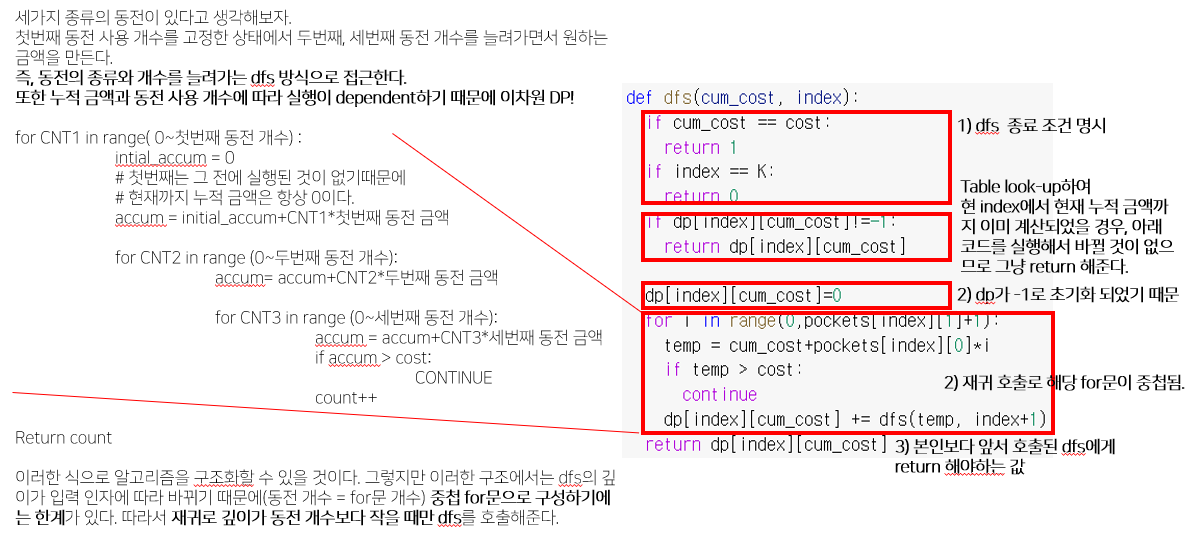

In [10]:
## 2차원 dp 풀이 ##

cost = int(input())
K = int(input())
pockets=[]
for k in range(K):
  pockets.append(list(map(int,input().split(" "))))
dp = [[-1]*(cost+1) for _ in range(K)]

def dfs(cum_cost, index):
  if cum_cost == cost:
    return 1
  if index == K:
    return 0
  if dp[index][cum_cost]!=-1:
    return dp[index][cum_cost]
  
  dp[index][cum_cost]=0
  for i in range(0,pockets[index][1]+1):
    temp = cum_cost+pockets[index][0]*i
    if temp > cost:
      continue
    dp[index][cum_cost] += dfs(temp, index+1)
  return dp[index][cum_cost]
dfs(0,0)
print(dp[0][0])

20
3
5 3
10 2
1 5
4
